# Machine Learning Work Flow, Pipe Line

**주의사항**
* preview)를 보고 할 것.
* 시각화에 날짜 붙이는 것에 너무 집착하지 말자.
    * 판다스를 경유하면 편하다.

# Training Work Flow

**무엇을 무슨 순서로 했는가?**
1. 여기에
2. 채워서
3. 적으면
4. 됩니다.

## 01. Data Loading

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data_path = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)

## 02. Train/Validation/Test Split
**실습**
1. 데이터를 분리 하시오.
    * 마지막 21일은 test_data로 분리
    * 그 다음 60일(-81 ~ -21)은 val_data로 분리
    * 나머지는 train_data로 분리

**주의사항**
* 이걸 제일 먼저 해야 한다.
* Training phase에서는
    1. 모든 탐색, 전처리규칙제작 등은 training set에서.
    2. validation셋에 대하여 고민해보자.


In [0]:
test_data = rides[-21*24:]
val_data = rides[-81*24:-21*24]
train_data = rides[:-81*24]

In [0]:
train_data.shape

(15435, 17)

In [0]:
train_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [0]:
train_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15435.000000,15435.000000,15435.000000,15435.000000,15435.000000,15435.000000,15435.000000,15435.000000,15435.000000,15435.000000,15435.000000,15435.000000,15435.000000,15435.000000,15435.000000,15435.000000
mean,7718.000000,2.363848,0.439909,5.959054,11.542468,0.027794,2.998704,0.684678,1.418400,0.513002,0.489545,0.626437,0.190757,36.329316,150.004470,186.333787
std,4455.845038,1.038105,0.496392,3.200486,6.914034,0.164387,2.004045,0.464659,0.642335,0.194913,0.173871,0.195437,0.122189,49.586925,148.052465,179.023641
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3859.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.360000,0.348500,0.470000,0.104500,4.000000,34.000000,39.500000
50%,7718.000000,2.000000,0.000000,6.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.540000,0.500000,0.630000,0.194000,17.000000,112.000000,139.000000
75%,11576.500000,3.000000,1.000000,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.790000,0.253700,50.000000,215.000000,276.000000
max,15435.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15435 entries, 0 to 15434
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15435 non-null  int64  
 1   dteday      15435 non-null  object 
 2   season      15435 non-null  int64  
 3   yr          15435 non-null  int64  
 4   mnth        15435 non-null  int64  
 5   hr          15435 non-null  int64  
 6   holiday     15435 non-null  int64  
 7   weekday     15435 non-null  int64  
 8   workingday  15435 non-null  int64  
 9   weathersit  15435 non-null  int64  
 10  temp        15435 non-null  float64
 11  atemp       15435 non-null  float64
 12  hum         15435 non-null  float64
 13  windspeed   15435 non-null  float64
 14  casual      15435 non-null  int64  
 15  registered  15435 non-null  int64  
 16  cnt         15435 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.0+ MB


## 03. EDA for Feature Engineering

* EDA는 명확한 목적하에, 반드시 workflow에 도움이 되는 결과를 도출해야 함.
* EDA를 검색해봐도 좋음.

In [0]:
train_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


무엇이 보이는가?


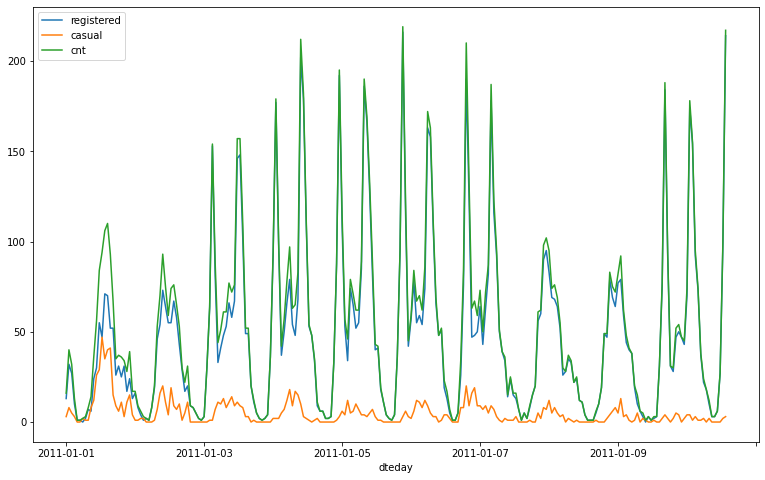

In [0]:
print('무엇이 보이는가?')
# train_data[:24*10].plot(x='dteday', y='cnt', figsize=(13,8) )
train_data[:24*10].plot(x='dteday', y=['registered','casual', 'cnt'], figsize=(13,8) )

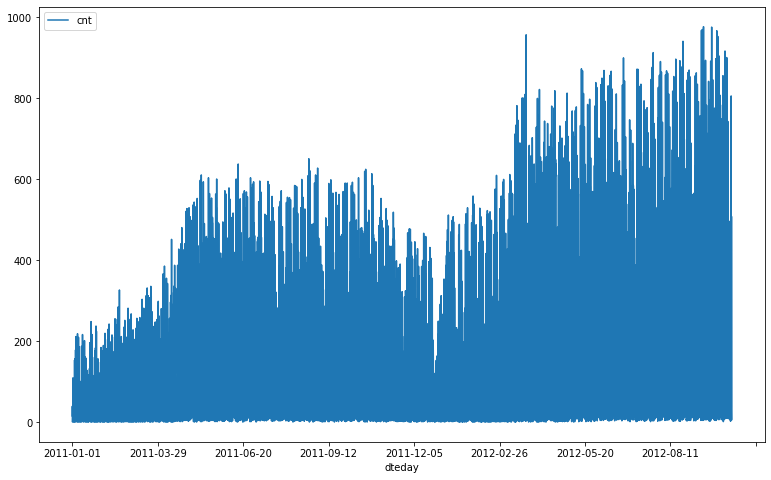

In [0]:
train_data.plot(x='dteday', y=['cnt'], figsize=(13,8) )

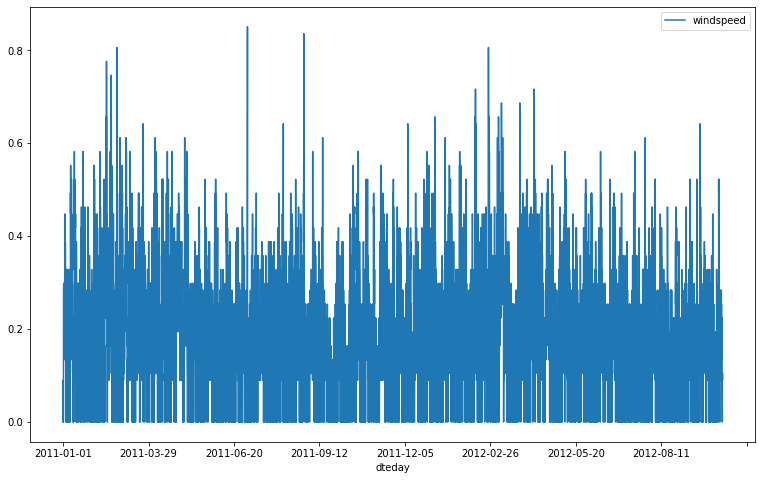

In [0]:
train_data.plot(x='dteday', y=['windspeed'], figsize=(13,8) )

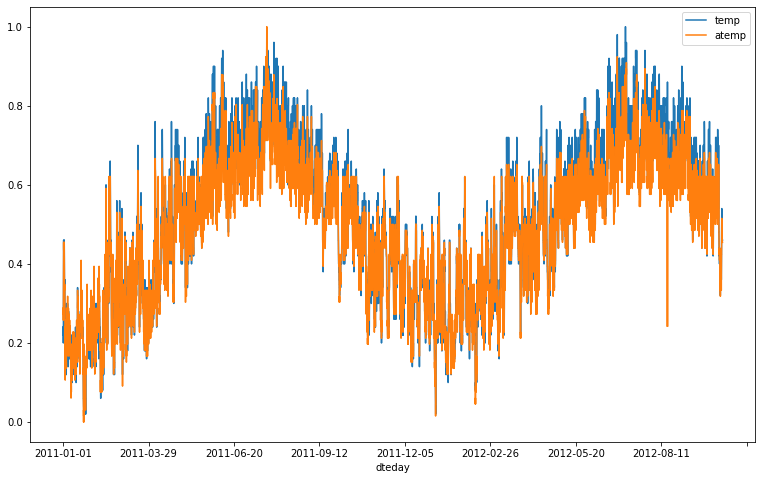

In [0]:
# 온도
train_data.plot(x='dteday', y=['temp', 'atemp'], figsize=(13,8))

**EDA의 결론을 적으시오**<br>
Hint : Feature Engineering/Extraction 계획을 하시오.<br>
[궁금할지도 모르는 내용](https://datascience.stackexchange.com/questions/29006/feature-selection-vs-feature-extraction-which-to-use-when)


- casual, registered는 cnt에 종속되는 변수이므로 생략할 수 있을 것으로 보인다.
- dte 변수는 이미 year, month, day, weekday 등 세부변수로 분리되었으므로 삭제 가능하다.
- atemp, temp는 비슷하게 trend를 갖고 있기 때문에 생략해볼 수 있을 것 같다.

## 04. Feature Engineering.

**주의사항** : 여기에서 제작 한 것을, test셋에서도 사용하게 될 것이다. 마구잡이로 하면 안됨

1. any ideas : ?
1. dummy : ?
2. scaling : ?
3. drop : ?
4. impute : ?


In [0]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
dummy_vars = []
for each in dummy_fields:
    dummies = pd.get_dummies(train_data[each], prefix=each, drop_first=False)
    train_data = pd.concat([train_data, dummies], axis=1)
    dummy_vars.extend(
        dummies.columns.tolist()
    )

# scaler
from sklearn.preprocessing import StandardScaler
quant_features = [
    # 'casual',
    # 'registered',
    # 'cnt',
    'temp',
    'hum',
    'windspeed',
]
scaler = StandardScaler()
train_data[quant_features] = scaler.fit_transform(train_data[quant_features])

# drop
fields_to_drop = [
    'instant',
    'dteday',
    'season',
    'weathersit', 
    'weekday',
    'atemp',
    'mnth',
    'workingday',
    'hr',
]
train_data = train_data.drop(fields_to_drop, axis=1)

In [0]:
dummy_vars

['season_1',
 'season_2',
 'season_3',
 'season_4',
 'weathersit_1',
 'weathersit_2',
 'weathersit_3',
 'weathersit_4',
 'mnth_1',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'hr_0',
 'hr_1',
 'hr_2',
 'hr_3',
 'hr_4',
 'hr_5',
 'hr_6',
 'hr_7',
 'hr_8',
 'hr_9',
 'hr_10',
 'hr_11',
 'hr_12',
 'hr_13',
 'hr_14',
 'hr_15',
 'hr_16',
 'hr_17',
 'hr_18',
 'hr_19',
 'hr_20',
 'hr_21',
 'hr_22',
 'hr_23',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

Feature Engineering 파트에서 사용한 것들을 diagram으로 잘 그려두기.

## 05. Modeling & Hyperparameter tuning

* Validation set을 적극 활용해보자.
* 여러 모델 다 사용해봐도 좋음.


In [0]:
# split x,y
X_train, y_train = train_data.drop(['cnt', 'casual', 'registered'], axis=1), train_data['cnt']

In [0]:
X_train, y_train

(       yr  holiday      temp  ...  weekday_4  weekday_5  weekday_6
 0       0        0 -1.400678  ...          0          0          1
 1       0        0 -1.503291  ...          0          0          1
 2       0        0 -1.503291  ...          0          0          1
 3       0        0 -1.400678  ...          0          0          1
 4       0        0 -1.400678  ...          0          0          1
 ...    ..      ...       ...  ...        ...        ...        ...
 15430   1        0 -0.271933  ...          0          0          0
 15431   1        0 -0.271933  ...          0          0          0
 15432   1        0 -0.271933  ...          0          0          0
 15433   1        0 -0.271933  ...          0          0          0
 15434   1        0 -0.271933  ...          0          0          0
 
 [15435 rows x 56 columns], 0         16
 1         40
 2         32
 3         13
 4          1
         ... 
 15430      6
 15431      6
 15432     40
 15433    175
 15434    507
 

In [0]:
# validation set

# build-dummy-base
for var_name in dummy_vars:
    val_data[var_name] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
for each in dummy_fields:
    dummies = pd.get_dummies(val_data[each], prefix=each, drop_first=False)
    for dummy_var in dummies:
        val_data[dummy_var] = dummies[dummy_var]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
# scaler
val_data[quant_features] = scaler.transform(val_data[quant_features])

# drop
val_data = val_data.drop(fields_to_drop, axis=1)

# split x,y
X_valid, y_valid = val_data.drop(['cnt', 'casual', 'registered'], axis=1), val_data['cnt']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
# X_valid, y_valid
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 15435 to 16874
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            1440 non-null   int64  
 1   holiday       1440 non-null   int64  
 2   temp          1440 non-null   float64
 3   hum           1440 non-null   float64
 4   windspeed     1440 non-null   float64
 5   season_1      1440 non-null   int64  
 6   season_2      1440 non-null   int64  
 7   season_3      1440 non-null   int64  
 8   season_4      1440 non-null   uint8  
 9   weathersit_1  1440 non-null   uint8  
 10  weathersit_2  1440 non-null   uint8  
 11  weathersit_3  1440 non-null   uint8  
 12  weathersit_4  1440 non-null   int64  
 13  mnth_1        1440 non-null   int64  
 14  mnth_2        1440 non-null   int64  
 15  mnth_3        1440 non-null   int64  
 16  mnth_4        1440 non-null   int64  
 17  mnth_5        1440 non-null   int64  
 18  mnth_6        1440 non-

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [0]:
models = [
    RandomForestRegressor(),
    DecisionTreeRegressor(max_depth=7),
    LinearRegression(),
    Lasso(alpha=0.1),
    Ridge(),
    ElasticNet(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
]
for model in models:
    model.fit(X_train, y_train)

In [0]:
from sklearn.metrics import r2_score, mean_squared_error
for model in models:
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    print(
        '{}\ntrain: r2:{}, rmse:{}\nvalid: r2:{}, rmse:{}'.format(
            model.__repr__().split('(')[0],
            r2_score(y_train, y_train_pred),
            mean_squared_error(y_train, y_train_pred, squared=True),
            r2_score(y_valid, y_valid_pred),
            mean_squared_error(y_valid, y_valid_pred, squared=True),
    ))

RandomForestRegressor
train: r2:0.9894976579854793, rmse:336.57262437899743
valid: r2:0.8203811052622185, rmse:7625.0438025033745
DecisionTreeRegressor
train: r2:0.6291890729138128, rmse:11883.521475995529
valid: r2:0.440670791733631, rmse:23744.2153247673
LinearRegression
train: r2:0.6908126485436592, rmse:9908.646867581669
valid: r2:0.6411999253355017, rmse:15231.506070963542
Lasso
train: r2:0.6904657780584939, rmse:9919.763160438091
valid: r2:0.6374830031183613, rmse:15389.294007235887
Ridge
train: r2:0.6908365764232541, rmse:9907.880041551822
valid: r2:0.641394531329963, rmse:15223.244806277757
ElasticNet
train: r2:0.3236878063191124, rmse:21674.0389535944
valid: r2:0.12034913218842169, rmse:37342.26517630688
AdaBoostRegressor
train: r2:0.3695199607089913, rmse:20205.23814110735
valid: r2:0.30698979814265903, rmse:29419.138518017116
GradientBoostingRegressor
train: r2:0.7815451934188455, rmse:7000.905841532038
valid: r2:0.644675611688113, rmse:15083.9588949211


In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(400,80))
plt.bar(X_train.columns, models[0].feature_importances_)
plt.show()
# len(train_data.columns), len(models[0].feature_importances_)

## 06. Evaluation on Test set & make a pipeline

* Go? or Not to go?
* 모든 규칙을 정리하여 파이프라인을 제작하자.

In [0]:
# testdata
# build-dummy-base
for var_name in dummy_vars:
    test_data[var_name] = 0

for each in dummy_fields:
    dummies = pd.get_dummies(test_data[each], prefix=each, drop_first=False)
    for dummy_var in dummies:
        test_data[dummy_var] = dummies[dummy_var]

# scaler
test_data[quant_features] = scaler.transform(test_data[quant_features])

# drop
test_data = test_data.drop(fields_to_drop, axis=1)

# split x,y
X_test, y_test = test_data.drop(['cnt', 'casual', 'registered'], axis=1), test_data['cnt']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [0]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 16875 to 17378
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            504 non-null    int64  
 1   holiday       504 non-null    int64  
 2   temp          504 non-null    float64
 3   hum           504 non-null    float64
 4   windspeed     504 non-null    float64
 5   season_1      504 non-null    uint8  
 6   season_2      504 non-null    int64  
 7   season_3      504 non-null    int64  
 8   season_4      504 non-null    uint8  
 9   weathersit_1  504 non-null    uint8  
 10  weathersit_2  504 non-null    uint8  
 11  weathersit_3  504 non-null    uint8  
 12  weathersit_4  504 non-null    int64  
 13  mnth_1        504 non-null    int64  
 14  mnth_2        504 non-null    int64  
 15  mnth_3        504 non-null    int64  
 16  mnth_4        504 non-null    int64  
 17  mnth_5        504 non-null    int64  
 18  mnth_6        504 non-nu

In [0]:
from sklearn.metrics import r2_score, mean_squared_error
for model in models:
    y_pred = model.predict(X_test)
    print(
        '{}, r2:{}, rmse:{}'.format(
            model.__repr__().split('(')[0],
            r2_score(y_test, y_pred),
            mean_squared_error(y_test, y_pred, squared=True),
        )
    )

RandomForestRegressor, r2:0.7413855631801929, rmse:5639.091890684028
DecisionTreeRegressor, r2:0.39834564978856757, rmse:13119.082635112218
LinearRegression, r2:0.45480330871519026, rmse:11888.022488064236
Lasso, r2:0.49049503131144545, rmse:11109.763911582198
Ridge, r2:0.4584516533354984, rmse:11808.470275837448
ElasticNet, r2:0.22628118323919344, rmse:16870.95105330694
AdaBoostRegressor, r2:-0.27626026942572546, rmse:27828.87538770849
GradientBoostingRegressor, r2:0.6015274548045318, rmse:8688.700158830003


In [52]:
# Tuning
selected_model = RandomForestRegressor(max_depth=18)
selected_model.fit(X_train, y_train)
y_pred = selected_model.predict(X_test)
print(
    '{}, r2:{}, rmse:{}'.format(
        selected_model.__repr__().split('(')[0],
        r2_score(y_test, y_pred),
        mean_squared_error(y_test, y_pred, squared=True),
    )
)

RandomForestRegressor, r2:0.756598289052025, rmse:5307.3781621158905


# ML Pipeline for system

Training Work Flow 의 모든 것을 재활용 한다.
* 처음에 pipeline부터 먼저 그린다. 같이 그리자!

**To-Do**
1. Training Phase : **전체 데이터를 이용하여 모델을 만든다.**(train/valid/test안나눈다.)
    * 하지만 이 실습에서는, 주어진 데이터만을 이용해야 하기 때문에 마지막 21일을 new_data로 떼어둔다.
    * 나머지 데이터를 old_data로 떼어둔다.
    * new_data는 마치 진짜로 데이터가 새로 들어올 때 처럼 사용할 것이다.

3. Prediction Phase :
    * new_data를 이용하여 예측값을 만들어본다.
4. Monitoring ?

## 01. Training Phase for model serving

* Training Work Flow의 여러 규칙들을, 전체 데이터(old_data)를 이용하여 다시 제작하면 됨.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data_path = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)

In [0]:
old_data = rides[:-21*24]
new_data = rides[-21*24:]

In [57]:
# testdata
# build-dummy-base
for var_name in dummy_vars:
    old_data[var_name] = 0

for each in dummy_fields:
    dummies = pd.get_dummies(old_data[each], prefix=each, drop_first=False)
    for dummy_var in dummies:
        old_data[dummy_var] = dummies[dummy_var]

# scaler
old_data[quant_features] = scaler.transform(old_data[quant_features])

# drop
old_data = old_data.drop(fields_to_drop, axis=1)

# split x,y
X_train, y_train = old_data.drop(['cnt', 'casual', 'registered'], axis=1), old_data['cnt']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [58]:
model = RandomForestRegressor(max_depth=18)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## 02. Prediction Phase

**아래 내용들을 이용하여 진행한다.**
* 위 Training Phase에서 제작한 규칙
* 위 Training Phase에서 제작한 모델

In [59]:
# testdata
# build-dummy-base
for var_name in dummy_vars:
    new_data[var_name] = 0

for each in dummy_fields:
    dummies = pd.get_dummies(new_data[each], prefix=each, drop_first=False)
    for dummy_var in dummies:
        new_data[dummy_var] = dummies[dummy_var]

# scaler
new_data[quant_features] = scaler.transform(new_data[quant_features])

# drop
new_data = new_data.drop(fields_to_drop, axis=1)

# split x,y
X_test, y_test = new_data.drop(['cnt', 'casual', 'registered'], axis=1), new_data['cnt']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [60]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)
print(
    '{}, r2:{}, rmse:{}'.format(
        model.__repr__().split('(')[0],
        r2_score(y_test, y_pred),
        mean_squared_error(y_test, y_pred, squared=True),
    )
)

RandomForestRegressor, r2:0.7659563626167276, rmse:5103.325219828264


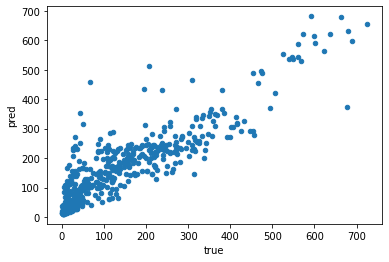

In [61]:
df = pd.DataFrame(data=zip(y_test, y_pred), columns=['true', 'pred'])
df.plot(x ='true', y='pred', kind = 'scatter')	

## 03. Monitoring을 한다면?
** Discussion **